## Prototype for generating 2D colored noise

See also: https://stackoverflow.com/questions/70085015/how-to-generate-2d-colored-noise#comment123897644_70088244

In [1]:
%matplotlib ipympl
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import colorednoise as cn

In [3]:
from matplotlib import mlab
from matplotlib import pylab as plt

In [4]:
from numpy import sqrt, newaxis
from numpy.fft import irfft, rfftfreq
from numpy.random import normal
from numpy import sum as npsum

In [5]:
from numpy.fft import irfftn, irfftn, irfft2, irfft2, rfftn

In [6]:
exponent = 2
size = np.array([5000,5000])

# The number of samples in each time series
#samples = size[-1]
fmin = 1./size

# Calculate Frequencies (we asume a sample rate of one)
# Use fft functions for real output (-> hermitian spectrum)
f = np.array([rfftfreq(l) for l in size])

# Build scaling factors for all frequencies
#s_scale = f    
#ix   = npsum(s_scale < fmin)   # Index of the cutoff
#if ix and ix < len(s_scale):
#    s_scale[:ix] = s_scale[ix]
#s_scale = s_scale**(-exponent/2.)
f[:,0] = f[:,1]
fx, fy = np.meshgrid(*f)
s_scale = 1 / (fx**exponent + fy**exponent)

# Adjust size to generate one Fourier component per frequency
size = s_scale.shape

# Add empty dimension(s) to broadcast s_scale along last
# dimension of generated random power + phase (below)
#dims_to_add = len(size) - 1
#s_scale     = s_scale[(newaxis,) * dims_to_add + (Ellipsis,)]

# Generate scaled random power + phase
sr = normal(scale=s_scale, size=size)
si = normal(scale=s_scale, size=size)

s  = sr + 1J * si

# Combine power + corrected phase to Fourier components
s  = sr + 1J * si

# Transform to real time series & scale to unit variance
y = irfft2(s, s=size)# / sigma

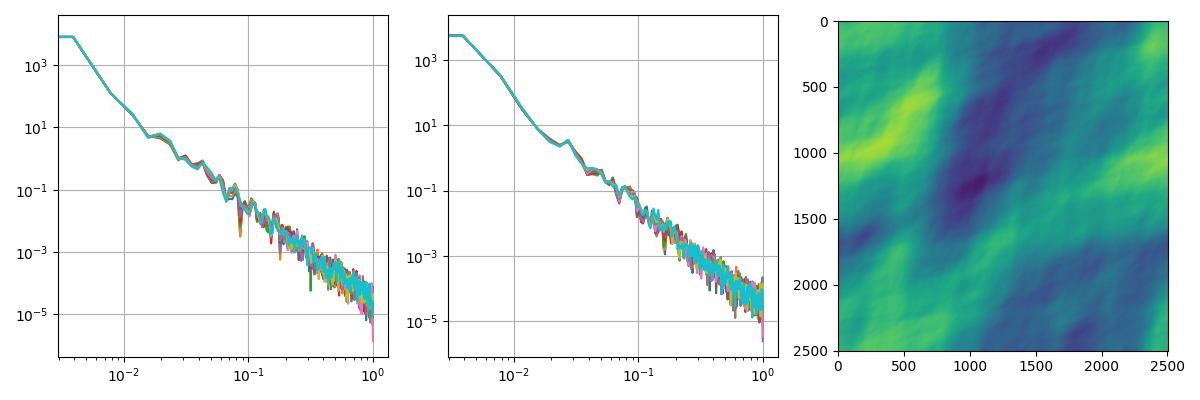

In [7]:
plt.close(2)
fig, ax = plt.subplots(ncols=3,num=2, figsize=(12,4))

for i in range(10):
    s, f = mlab.psd(y[i,:], NFFT=2**9)
    ax[0].loglog(f,s)
    ax[0].grid(True)

for i in range(10):
    s, f = mlab.psd(y[:,i], NFFT=2**9)
    ax[1].loglog(f,s)
    ax[1].grid(True)
    
vmax = 3*np.std(y)
ax[2].imshow(y, vmin=-vmax, vmax=vmax)
fig.tight_layout()